## PROJETO 01: DETECÇÃO DE FRAUDES NO TRÁFEGO DE CLIQUES EM PROPAGANDAS DE APLICAÇÕES MOBILE

![<caption>](TalkingData.jpeg)

A TalkingData (https://www.talkingdata.com), a maior plataforma de big data independente da china, cobre mais de 70% dos dispositivos móveis ativos em todo o país. eles lidam com 3 bilhões de cliques por dia, dos quais 90% são potencialmente fraudulentos. sua abordagem atual para impedir fraudes de cliques para desenvolvedores de aplicativos é medir a jornada do clique de um usuário em todo o portifólio e sinalizar endereços ip produzem muitos cliques, mas nunca acabam instalando aplicativos. com esses informações, eles criaram uma lista negra de ips e uma lista negra de dispositivos. embora bem-sucedidos, eles querem estar sempre um passo à frente dos fraudadores e pretedem desenvolver ainda mais a solução. Então, neste projeto, o objetivo é construir um modelo de aprendizado de máquina para determinar se um clique é fraudulento ou não.

    
#### DICIONÁRIO DE DADOS:

1 - **File descriptions:**
    
**train_sample.csv** - 100.000 linhas selecionadas aleatoriamente de dados de treinamento, para inspecionar os dados antes de baixar o conjunto completo.

**test.csv** - conjunto de teste.

**sampleSubmission.csv** - um arquivo de envio de amostra no formato correto.

**test_supplement.csv** - Este é um conjunto de teste maior que foi lançado acidentalmente no ínicio da competição. Não é necessário usar esses dados, mas é permitido fazê-lo. Os dados de teste oficiais são um subconjunto desses dados.

**train.csv** - conjunto de treinamento

2 - Variáveis do arquivo **train.csv**:

**ip** - IP - Endereço de clique

**app** - ID.App - ID de aplicativo para marketing

**device** - Tipo.Dispositivo - Identificação do tipo de dispositivo do telefone celular do usuário

**os** - ID.OS - ID versão do OS

**channel** - ID.Canal.Anuncio - ID do canal do editor de anúncio

**click_time** - Click.Horario - Hora do click (UTC)

**attributed_time** - Hora.Download - Hora do download do aplicativo.

**is_attributed** - Aplicativo.Baixado (variável Target) - Indica se o aplicativo foi baixado (0 = Não baixado, 1 = Baixado)

#### **DIRETÓRIO DE TRABALHO E CARREGAMENTO DE BIBLIOTECAS**

In [1]:
# DIRETÓRIO DE TRABALHO
setwd('C:/FCD/DataScienceAcademy/BigDataRAzure/Projeto1')
getwd()

[1] "C:/FCD/DataScienceAcademy/BigDataRAzure/Projeto1"

In [2]:
# DESATIVAR MENSAGENS DE WARNINGS (warn = -1) E ATIVAR (warn = 0)
options(warn = -1)
# DESATIVA NOTAÇÃO CIENTÍFICA
options(scipen = 999)
# PARA TAMANHO DOS GRÁFICOS
options(jupyter.plot_scale = 1)

In [3]:
# CARREGANDO BIBLIOTECAS 
suppressPackageStartupMessages({
library(dplyr)
library(data.table)
library(tidyr)
library(stringr)
library(readr)
library(ggplot2)
library(gridExtra)
library(lubridate)
library(scales)
library(caTools)
library(themis)
library(janitor)
library(caret)
library(e1071)
library(ROCR)
library(kernlab)
library(class)
library(rpart)
library(rpart.plot)
library(randomForest)})

### **1 - PRÉ-PROCESSAMENTO DE DADOS**

In [ ]:
# CARREGANDO train_csv
#treino_csv <- fread('train.csv')

In [ ]:
# RENOMEANDO DATASET
#names(treino_csv) <- c("IP", "ID.App", "Tipo.Dispositivo", "ID.OS", "ID.Canal.Anuncio", 
#                       "Click.Horario", "Hora.Download", "Aplicativo.Baixado")

In [ ]:
# COLETANDO AMOSTRA
#df_Talking_Data <- sample_n(treino_csv, size = 4500000)

In [ ]:
# SALVANDO O DATASET
#write_csv(df_Talking_Data, 'df_Talking_Data.csv')

In [4]:
# CARREGANDO df_Talking_Data
df_Talking_Data <- fread('df_Talking_Data.csv'); glimpse(df_Talking_Data)

Rows: 4,500,000
Columns: 8
$ IP                 <int> 101863, 288158, 58404, 34222, 40631, 134018, 81613,~
$ ID.App             <int> 3, 18, 2, 28, 2, 3, 3, 3, 3, 12, 28, 9, 18, 14, 3, ~
$ Tipo.Dispositivo   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ ID.OS              <int> 13, 19, 17, 19, 19, 19, 14, 15, 13, 9, 13, 13, 37, ~
$ ID.Canal.Anuncio   <int> 137, 121, 237, 135, 236, 280, 280, 280, 280, 19, 13~
$ Click.Horario      <chr> "2017-11-07T08:50:35Z", "2017-11-09T01:14:54Z", "20~
$ Hora.Download      <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,~
$ Aplicativo.Baixado <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~


In [5]:
df_Talking_Data$Click.Horario <- as_datetime(df_Talking_Data$Click.Horario)
df_Talking_Data$Hora.Download <- as_datetime(df_Talking_Data$Hora.Download); glimpse(df_Talking_Data)

Rows: 4,500,000
Columns: 8
$ IP                 <int> 101863, 288158, 58404, 34222, 40631, 134018, 81613,~
$ ID.App             <int> 3, 18, 2, 28, 2, 3, 3, 3, 3, 12, 28, 9, 18, 14, 3, ~
$ Tipo.Dispositivo   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ ID.OS              <int> 13, 19, 17, 19, 19, 19, 14, 15, 13, 9, 13, 13, 37, ~
$ ID.Canal.Anuncio   <int> 137, 121, 237, 135, 236, 280, 280, 280, 280, 19, 13~
$ Click.Horario      <dttm> 2017-11-07 08:50:35, 2017-11-09 01:14:54, 2017-11-~
$ Hora.Download      <dttm> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA~
$ Aplicativo.Baixado <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~


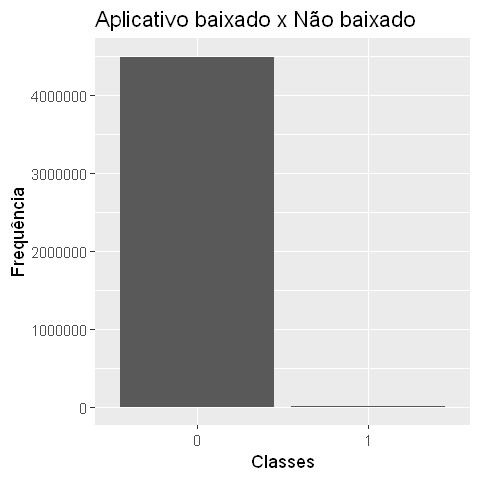

In [6]:
# QUANTIDADE DE CLASSES
g0 <- ggplot(df_Talking_Data, aes(x = as.factor(Aplicativo.Baixado))) +
geom_bar(stat = 'count') +
coord_cartesian(ylim = c(0, 4500000)) +
labs(title = "Aplicativo baixado x Não baixado",x = 'Classes', y = 'Frequência')

options(repr.plot.width = 4, repr.plot.height = 4)
g0

In [7]:
total.obs <- nrow(df_Talking_Data)
baixado <- nrow(df_Talking_Data[df_Talking_Data$Aplicativo.Baixado == 1,])
nao.baixado <- nrow(df_Talking_Data[df_Talking_Data$Aplicativo.Baixado == 0,])

In [8]:
percentual.nao.baixado <- nao.baixado/total.obs 
percentual.baixado <- baixado/total.obs; 
cat("classe 0 (não baixado)\nPercentual:", round(percentual.nao.baixado*100, 2))
cat("\n\nclasse 1 (baixado)\nPercentual:",round(percentual.baixado*100, 2))

classe 0 (não baixado)
Percentual: 99.75

classe 1 (baixado)
Percentual: 0.25

In [9]:
## SLICE DATASET - APLICATIVO NÃO BAIXADO
df_nao_baixado <- df_Talking_Data[df_Talking_Data$Aplicativo.Baixado == 0,]
df_nao_baixado$Aplicativo.Baixado <- as.factor(df_nao_baixado$Aplicativo.Baixado)

In [10]:
# FUNÇÃO PARA PLOTAGEM DO GRÁFICO DE BARRAS
grafico.barras <- function(x, xlab, title){
    ggplot(x[1:15,], aes(x = reorder(Var1, Freq), y = Freq)) +
        geom_bar(stat = "identity") + labs(x = xlab, y = "Frequência", title = title) +
        theme_minimal() +
        theme(text = element_text(size = 8)) +
        coord_flip()
}

In [11]:
# IP DE ENDEREÇO DE CLIQUE - ID
ip <- data.frame(table(df_nao_baixado$IP))
ip <- ip[order(ip$Freq, decreasing = T),]

# 15 IPS DE ENDEREÇO DE CLIQUES (IP) LIGADOS A CLIQUES QUE NÃO BAIXARAM O APLICATIVO
g1 = grafico.barras(ip, 'IP', 'IP dos cliques sem download')

In [12]:
# ID DE APLICATIVO PARA MARKETING - ID.App
id.aplicativo <- data.frame(table(df_nao_baixado$ID.App))
id.aplicativo <- id.aplicativo[order(id.aplicativo$Freq, decreasing = T),]

# 15 IDS DE APLICATIVOS (ID.App) LIGADOS A CLIQUES QUE NÃO BAIXARAM O APLICATIVO
g2 = grafico.barras(id.aplicativo, 'ID do aplicativo', 'ID do aplicativo de marketing e cliques sem download')

In [13]:
# IDENTIFICAÇÃO DO TIPO DISPOSITIVO - Tipo.Dispositivo
identificacao.dispositivo <- data.frame(table(df_nao_baixado$Tipo.Dispositivo))
identificacao.dispositivo <- identificacao.dispositivo[order(identificacao.dispositivo$Freq, decreasing = T),]

# 15 TIPOS DE DISPOSITIVOS (Tipo.Dispositivo) LIGADOS A CLIQUES QUE NÃO BAIXARAM O APLICATIVO
g3 = grafico.barras(identificacao.dispositivo, 'Tipo do dispositivo', 'Tipo dispositivo e cliques sem download')

In [14]:
# ID VERSÃO DO SISTEMA OPERACIONAL DO CELULAR DO USUÁRIO - ID.OS
id.sistema.operacional <- data.frame(table(df_nao_baixado$ID.OS))
id.sistema.operacional <- id.sistema.operacional[order(id.sistema.operacional$Freq, decreasing = T),]

# 15 IDS VERSÃO DO SISTEMA OPERACIONAL DO CELULAR DO USUÁRIO (ID.OS) LIGADOS A CLIQUES QUE NÃO BAIXARAM O APLICATIVO
g4 <- grafico.barras(id.sistema.operacional, 'ID do OS', 'ID do OS do usuário e cliques sem download ')

In [15]:
# ID DO CANAL DE ANÚNCIOS - ID.Canal.Anuncio
id.canal <- data.frame(table(df_nao_baixado$ID.Canal.Anuncio))
id.canal <- id.canal [order(id.canal$Freq, decreasing = T),]

# 15 IDS DE APLICATIVOS (ID.App) LIGADOS A CLIQUES QUE NÃO BAIXARAM O APLICATIVO
g5 <- grafico.barras(id.canal, "ID Canal Anúncios", 'Canal e cliques sem download')

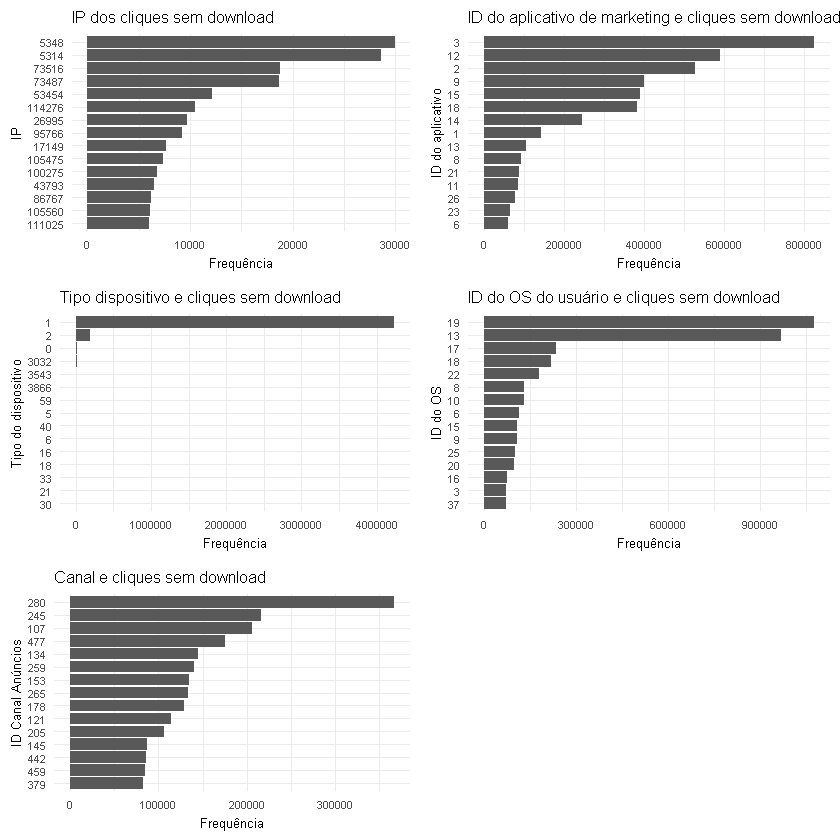

In [16]:
options(repr.plot.width = 7, repr.plot.height = 7)
grid.arrange(g1, g2, g3, g4, g5)

O tipo de dispositivo 1 é o que mais está associado à cliques sem downloads. Os IDs do sistema operacional 19 e 13 são os mais associados à cliques sem downloads. Já o canal mais vulnerável a cliques sem downloads é o 280.

In [17]:
# PERÍODO DE CLIQUES NO DATASET - DATA E HORÁRIO
# dif_dia <- as.duration(fim-inicio); dif_dia -> outra forma de ver a diferença de dias
inicio <- min(df_Talking_Data$Click.Horario); cat(sprintf("De: %s",inicio))
fim <- max(df_Talking_Data$Click.Horario); cat(sprintf("\nAté: %s",fim))

De: 2017-11-06 14:48:55
Até: 2017-11-09 16:00:00

In [18]:
# DIFERENÇA EM DIAS
diferenca_dia <- fim - inicio; diferenca_dia

Time difference of 3.049363 days

In [19]:
# TABELA COM A FREQUENCIA DE CLIQUES SEM DOWNLOAD EM DETERMINADO HORÁRIO 
df <- data.frame(table(df_nao_baixado$Click.Horario)); head(df,3)

Var1,Freq
2017-11-06 14:48:55,1
2017-11-06 15:39:18,1
2017-11-06 15:43:36,1


In [20]:
# ACRESCENTANDO DATA E DIA E HORA (SEM CONTAR MINUTOS E SEGUNDOS)
df <- df %>%
    mutate(Data = make_date(year(df$Var1), month(df$Var1), day(df$Var1)),
           Data.Horario = df$Var1,
           Freq.Cliques = df$Freq,
           Dia.Hora = make_datetime(year(df$Var1), month(df$Var1), day(df$Var1), hour(df$Var1)))
df <- select(df, Data, Data.Horario, Dia.Hora, Freq.Cliques); head(df,3)

Data,Data.Horario,Dia.Hora,Freq.Cliques
2017-11-06,2017-11-06 14:48:55,2017-11-06 14:00:00,1
2017-11-06,2017-11-06 15:39:18,2017-11-06 15:00:00,1
2017-11-06,2017-11-06 15:43:36,2017-11-06 15:00:00,1


In [21]:
# AGRUPAMENTO POR DIA E HORA
df2 <- df %>%
     group_by(Data,Dia.Hora) %>%
     summarise(Freq.Cliques = sum(Freq.Cliques), .groups = "keep"); head(df2,3)

Data,Dia.Hora,Freq.Cliques
2017-11-06,2017-11-06 14:00:00,1
2017-11-06,2017-11-06 15:00:00,11
2017-11-06,2017-11-06 16:00:00,55935


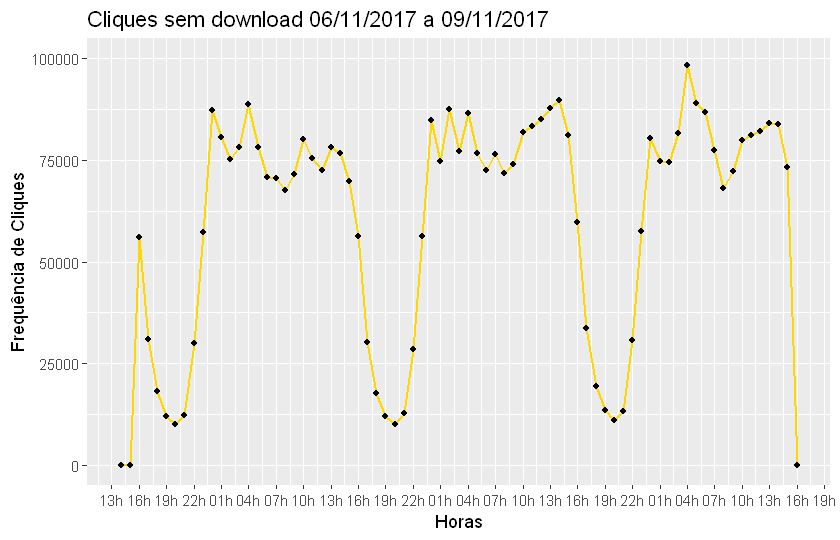

In [22]:
g6 <- ggplot(df2, aes(x = Dia.Hora , y = Freq.Cliques)) +
geom_line(size = 0.7,colour = 'gold') +                    
geom_point(size = 1.3, colour = 'black') +
scale_x_datetime(labels = date_format(format = '%Hh', tz = "UTC"), date_breaks = "3 hours") +
coord_cartesian(ylim = c(0, 100000)) +
labs(x = 'Horas', y = 'Frequência de Cliques', title = 'Cliques sem download 06/11/2017 a 09/11/2017')

options(repr.plot.width = 7, repr.plot.height = 4.5)
g6

No gráfico precebe-se que os picos ocorrem de 00h00 às 14h00. Há um enorme crescimento de cliques sem download no período de 21h00 às 00h00 nos dias 6, 7 e 8 e uma queda enorme no período de 15h00 às 20h00 nos dias 6 e 7 e de 15h00 às 16h00 no dia 9.

In [23]:
# ESTATÍSTICA DE CLIQUES SEM DOWNLOAD POR HORA - DIA 06/11/2017 DE 14h48 ÀS 23h59
dia06 <- df2[df2$Data == as.Date('2017-11-06'),]
# ESTATÍSTICA DE CLIQUES FRAUDULENTOS POR HORA - DIA 07/11/2017 DE 00h ÀS 23h59
dia07 <- df2[df2$Data == as.Date('2017-11-07'),]
# ESTATÍSTICA DE CLIQUES FRAUDULENTOS POR HORA - DIA 08/11/2017 DE 00h ÀS 23h59
dia08 <- df2[df2$Data == as.Date('2017-11-08'),]
# ESTATÍSTICA DE CLIQUES FRAUDULENTOS POR HORA - DIA 09/11/2017 DE 00h ÀS 16h00
dia09 <- df2[df2$Data == as.Date('2017-11-09'),]

In [24]:
cat("Estatísticas cliques sem download:\n\nDia 06-11-2017 das 14h48 às 23h59\n\nMédia de cliques/hora:",
    mean(dia06$Freq.Cliques),"\nMédia de cliques/minuto:", mean(dia06$Freq.Cliques)/60)

cat("\n\nDia 07-11-2017 das 00h às 23h59 \n\nMédia de cliques/hora:", mean(dia07$Freq.Cliques),
"\nMédia de cliques/minuto:", mean(dia07$Freq.Cliques)/60)

cat("\n\nDia 08-11-2017 das 00h às 23h59 \n\nMédia de cliques/hora:", mean(dia08$Freq.Cliques),
"\nMédia de cliques/minuto:", mean(dia08$Freq.Cliques)/60)

cat("\n\nDia 09-11-2017 das 00h às 16h00 \n\nMédia de cliques/hora:", mean(dia09$Freq.Cliques),
"\nMédia de cliques/minuto:", mean(dia09$Freq.Cliques)/60)

Estatísticas cliques sem download:

Dia 06-11-2017 das 14h48 às 23h59

Média de cliques/hora: 22618.9 
Média de cliques/minuto: 376.9817

Dia 07-11-2017 das 00h às 23h59 

Média de cliques/hora: 60213.33 
Média de cliques/minuto: 1003.556

Dia 08-11-2017 das 00h às 23h59 

Média de cliques/hora: 63750.04 
Média de cliques/minuto: 1062.501

Dia 09-11-2017 das 00h às 16h00 

Média de cliques/hora: 75741.65 
Média de cliques/minuto: 1262.361

No dia 09/11 houve a maior média de cliques por hora. Em 16 horas, a média obtida foi de 75741.65 cliques, o que superou as médias dos dias 07/11 e 08/11 em 24 horas.

In [25]:
# AGRUPAMENTO POR HORA PARA SABER EM QUAL HORÁRIO SE TEM MAIS CLIQUES SEM DOWNLOADS
df3 <- df %>%
    separate (col = Dia.Hora, c ("Dia", "Hora"), sep = ' ', remove = TRUE)

df4 <- df3 %>%
             group_by(Hora) %>%
             summarise(Horario.Mais.Cliques = sum(Freq.Cliques))

df4 <- df4 %>%
     separate(col = Hora, c ("Hora", "s", "m"), sep = ':', remove = TRUE) %>%
     select(Hora, Horario.Mais.Cliques)

head(df4, 5)

Hora,Horario.Mais.Cliques
00,252433
01,230007
02,237182
03,236996
04,273690


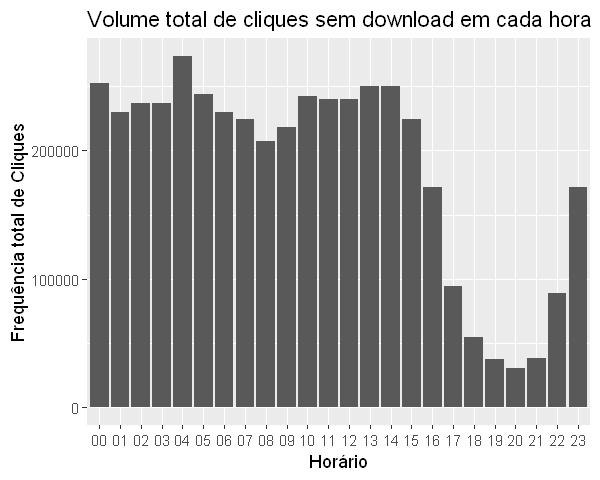

In [26]:
# HORÁRIOS COM MAIOR VOLUME DE CLIQUES NOS TRÊS DIAS
g7 <- ggplot(df4, aes(x = Hora, y = Horario.Mais.Cliques)) +                 
     geom_bar(stat="identity") +
     labs(x = 'Horário', y = 'Frequência total de Cliques', title = 'Volume total de cliques sem download em cada hora')

options(repr.plot.width = 5, repr.plot.height = 4)
g7

Nos horários de 00h00 a 15h00 é quando mais se tem cliques sem download.

In [27]:
df_Talking_Data$Aplicativo.Baixado <- as.factor(df_Talking_Data$Aplicativo.Baixado)
glimpse(df_Talking_Data)

Rows: 4,500,000
Columns: 8
$ IP                 <int> 101863, 288158, 58404, 34222, 40631, 134018, 81613,~
$ ID.App             <int> 3, 18, 2, 28, 2, 3, 3, 3, 3, 12, 28, 9, 18, 14, 3, ~
$ Tipo.Dispositivo   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ ID.OS              <int> 13, 19, 17, 19, 19, 19, 14, 15, 13, 9, 13, 13, 37, ~
$ ID.Canal.Anuncio   <int> 137, 121, 237, 135, 236, 280, 280, 280, 280, 19, 13~
$ Click.Horario      <dttm> 2017-11-07 08:50:35, 2017-11-09 01:14:54, 2017-11-~
$ Hora.Download      <dttm> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA~
$ Aplicativo.Baixado <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~


#### **SEPARANDO DADOS DE TREINO E TESTE**

In [ ]:
#split <- sample.split(df_Talking_Data$Aplicativo.Baixado, SplitRatio = 0.7)
#dados_treino <- subset(df_Talking_Data, split == TRUE)
#dados_teste <- subset(df_Talking_Data, split == FALSE )

In [ ]:
# DADOS TREINO 70%
#glimpse(dados_treino)

In [ ]:
# DADOS TESTE 30%
#glimpse(dados_teste)

#### **BALANCEAMENTO DE CLASSES DOS DADOS DE TREINO**

In [ ]:
#tabyl(dados_treino$Aplicativo.Baixado)

In [ ]:
# BALANCEAMENTO NOS DADOS DE TREINO (DOWNSAMPLE)
#dados_treino_down_sample <- recipe (Aplicativo.Baixado~., dados_treino) %>%
#step_downsample(Aplicativo.Baixado) %>%
#prep() %>%
#juice() 

In [ ]:
#tabyl(dados_treino_down_sample$Aplicativo.Baixado)

In [ ]:
# REMOVENDO AS VARIÁVEIS Click.Horario e Hora.Download DO DATASET DE TREINO BALANCEADO
#dados_treino_down_sample <- select(dados_treino_down_sample, -Click.Horario, -Hora.Download)
# DADOS TREINO BALANCEADO
#glimpse(dados_treino_down_sample)

In [ ]:
# REMOVENDO AS VARIÁVEIS Click.Horario e Hora.Download DO DATASET DE TESTE
#dados_teste_final <- select(dados_teste, -Click.Horario, -Hora.Download)
# DADOS TREINO BALANCEADO
#glimpse(dados_teste_final)

In [ ]:
# SALVANDO DADOS DE TREINO (dados_treino_down_sample) E TESTE (dados_teste_final)
#write_csv(dados_treino_down_sample, "dados_treino_down_sample.csv")
#write_csv(dados_teste_final, "dados_teste_final.csv")

In [28]:
# CARREGANDO DADOS DE TREINO
dados_treino_down_sample <- fread("dados_treino_down_sample.csv")
dados_treino_down_sample <- as.data.frame(dados_treino_down_sample)
dados_treino_down_sample$Aplicativo.Baixado <- as.factor(dados_treino_down_sample$Aplicativo.Baixado)
glimpse(dados_treino_down_sample)

Rows: 15,514
Columns: 6
$ IP                 <int> 133783, 133522, 175250, 100971, 25679, 140869, 7558~
$ ID.App             <int> 12, 1, 12, 14, 18, 3, 18, 15, 2, 14, 18, 3, 15, 12,~
$ Tipo.Dispositivo   <int> 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ~
$ ID.OS              <int> 20, 9, 13, 19, 13, 1, 19, 13, 17, 3, 13, 16, 13, 13~
$ ID.Canal.Anuncio   <int> 245, 125, 497, 489, 107, 280, 107, 3, 469, 134, 107~
$ Aplicativo.Baixado <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~


In [29]:
# CARREGANDO DADOS DE TESTE
dados_teste_final <- fread("dados_teste_final.csv")
dados_teste_final <- as.data.frame(dados_teste_final)
dados_teste_final$Aplicativo.Baixado <- as.factor(dados_teste_final$Aplicativo.Baixado)
glimpse(dados_teste_final)

Rows: 1,350,000
Columns: 6
$ IP                 <int> 81613, 48383, 74013, 114759, 40213, 120282, 5178, 8~
$ ID.App             <int> 3, 3, 9, 3, 18, 12, 3, 3, 3, 2, 2, 14, 18, 18, 1, 2~
$ Tipo.Dispositivo   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ ID.OS              <int> 14, 15, 13, 20, 6, 18, 20, 25, 41, 19, 22, 19, 17, ~
$ ID.Canal.Anuncio   <int> 280, 280, 134, 137, 134, 265, 442, 280, 280, 122, 2~
$ Aplicativo.Baixado <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~


### **2 - APRENDIZADO**

### **MODELO 1 - REGRESSÃO LOGÍSTICA (pacote:caret)**

In [30]:
# MODELO
modelo.rl.inicial <- glm(formula = Aplicativo.Baixado ~ ., data = dados_treino_down_sample, family = "binomial" )

In [31]:
# VISUALIZAÇÃO DO MODELO
summary(modelo.rl.inicial)


Call:
glm(formula = Aplicativo.Baixado ~ ., family = "binomial", data = dados_treino_down_sample)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.8205  -0.1653   0.8127   2.4097  

Coefficients:
                      Estimate    Std. Error z value            Pr(>|z|)    
(Intercept)      -1.5305140195  0.0614078566 -24.924 <0.0000000000000002 ***
IP                0.0000090538  0.0000002268  39.916 <0.0000000000000002 ***
ID.App            0.0677329410  0.0018328644  36.955 <0.0000000000000002 ***
Tipo.Dispositivo -0.0001889478  0.0001056454  -1.789              0.0737 .  
ID.OS            -0.0011687494  0.0004859416  -2.405              0.0162 *  
ID.Canal.Anuncio -0.0030982494  0.0001642664 -18.861 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21507  on 15513  degrees of freedom
Residual deviance: 16016  on 15508  degrees of freed

In [32]:
# OVERALL DAS VARIÁVEIS MAIS IMPORTANTES
varImp(modelo.rl.inicial) 

,Overall
IP,39.915888
ID.App,36.954692
Tipo.Dispositivo,1.788509
ID.OS,2.405123
ID.Canal.Anuncio,18.861126


In [33]:
# MODELO FINAL
modelo.rl <- glm(formula = Aplicativo.Baixado ~.-Tipo.Dispositivo, data = dados_treino_down_sample, family = "binomial" )

In [34]:
# VISUALIZAÇÃO DO MODELO FINAL
summary(modelo.rl)


Call:
glm(formula = Aplicativo.Baixado ~ . - Tipo.Dispositivo, family = "binomial", 
    data = dados_treino_down_sample)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.8211  -0.1653   0.8133   2.4098  

Coefficients:
                      Estimate    Std. Error z value             Pr(>|z|)    
(Intercept)      -1.5231206761  0.0612287900 -24.876 < 0.0000000000000002 ***
IP                0.0000090561  0.0000002268  39.924 < 0.0000000000000002 ***
ID.App            0.0675938839  0.0018291838  36.953 < 0.0000000000000002 ***
ID.OS            -0.0016379241  0.0004083760  -4.011            0.0000605 ***
ID.Canal.Anuncio -0.0030957010  0.0001642165 -18.851 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21507  on 15513  degrees of freedom
Residual deviance: 16019  on 15509  degrees of freedom
AIC: 16029

Number of Fisher Scoring iterati

In [35]:
# PREVISÃO DO MODELO
previsao.modelo.rl <- predict(modelo.rl, dados_teste_final, type = "response")

In [36]:
# AVALIAÇÃO DO MODELO
# MATRIZ DE CONFUSÃO
matriz_confusao1 <- table(Previsto = as.factor(round(previsao.modelo.rl)), Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao1

        Reference
Previsto       0       1
       0 1085822     871
       1  260853    2454

#### **MÉTRICAS  DO MODELO DE REGRESSÃO LOGÍSTICA**

In [ ]:
# ACURÁCIA (Accuracy) - MEDE A PRECISÃO DO MODELO DE CLASSIFICAÇÃO. QUANTO MAIOR MELHOR.
# TRUE POSITIVO = tp
# TRUE NEGATIVO = tn
# FALSO POSITIVO = fp
# FALSO NEGATIVO = fn

# ACURÁCIA = tp + tn/ tp + tn + fp + fn  
# TOTAL DE RESULTADOS CORRETOS/ TOTAL DE RESULTADOS ANALISADOS

# PRECISÃO = tp/(tp + fp) 
# PROPORÇÃO DE RESULTADOS VERDADEIROS SOBRE OS POSITIVOS. QUANTO MAIOR MELHOR.

# RECALL = tp/(tp + fn) 
# FRAÇÃO DE RESULTADOS CORRETOS RETORNADO PELO MODELO. QUANTO MAIOR MELHOR.
 
# F1 SCORE = 2*tp / (2 * tp + fp + fn) OU 2 * precisao * recall/ (precisao + recall) 
# MÉDIA PODERADA ENTRE A PRECISÃO E RECALL. O VALOR IDEAL PARA O F-SCORE É IGUAL A 1.

In [37]:
# CARREGANDO FUNÇÕES DE MÉTRICAS PARA SEREM USADAS A PARTIR DA MATRIZ DE CONFUSÃO
source("Metricas_classificacao.R") 

In [38]:
metricas_class(matriz_confusao1,'Modelo Regressão Logística:')

Modelo Regressão Logística: 
 
Acuracia   = 0.8061 
Recall     = 0.8063 
Precisao   = 0.9992 
F1 Score   = 0.8924

In [39]:
# CURVA ROC 
# AUC - QUANTO MAIS A ESQUERDA ESTIVER A CURVA, MAIOR A PRECISÃO DO MODELO
source("plot_utils.R") 
previsao1 <- prediction(previsao.modelo.rl, dados_teste_final$Aplicativo.Baixado)

In [40]:
pred1 <- performance(previsao1,"auc"); 
auc1 <- round(as.numeric(pred1@y.values), 4)
cat("AUC =", auc1)

AUC = 0.8439

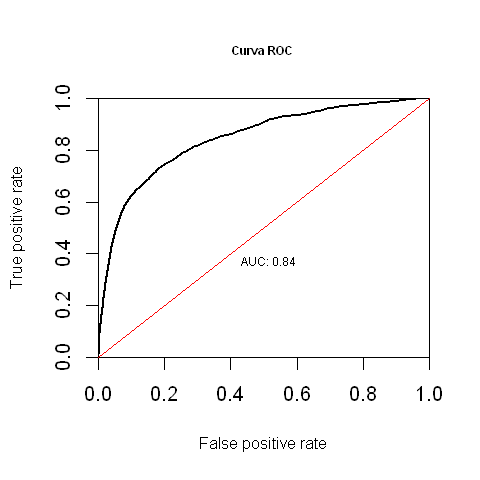

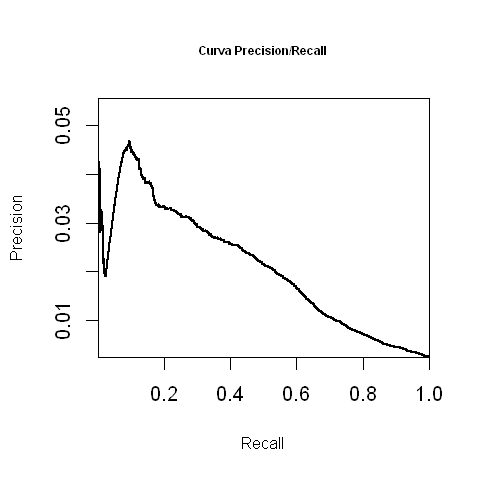

In [41]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot.roc.curve(previsao1, title.text = "Curva ROC")
plot.pr.curve(previsao1, title.text = "Curva Precision/Recall")

### **MODELO 2 - NAIVE BAYES (pacote:e1071)**

In [42]:
# MODELO
modelo.naivebayes <- naiveBayes(Aplicativo.Baixado ~ ., data = dados_treino_down_sample)

In [43]:
# VISUALIZAÇÃO DO MODELO
summary(modelo.naivebayes)

          Length Class  Mode     
apriori   2      table  numeric  
tables    5      -none- list     
levels    2      -none- character
isnumeric 5      -none- logical  
call      4      -none- call     

In [44]:
# PREVISÃO DO MODELO
previsao.modelo.naivebayes <- predict(modelo.naivebayes, dados_teste_final)

In [45]:
# MATRIZ DE CONFUSÃO
matriz_confusao2 <- table(Previsto = previsao.modelo.naivebayes, Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao2

        Reference
Previsto       0       1
       0 1181586    1226
       1  165089    2099

#### **MÉTRICAS  DO MODELO NAIVE BAYES**

In [46]:
metricas_class(matriz_confusao2,"Modelo Nayve Bayes:")

Modelo Nayve Bayes: 
 
Acuracia   = 0.8768 
Recall     = 0.8774 
Precisao   = 0.999 
F1 Score   = 0.9342

In [47]:
# CURVA ROC  
previsao2 <- prediction(as.double(previsao.modelo.naivebayes), dados_teste_final$Aplicativo.Baixado)

In [48]:
pred2 <- performance(previsao2,"auc"); 
auc2 <- round(as.numeric(pred2@y.values), 4)
cat("AUC =", auc2)

AUC = 0.7543

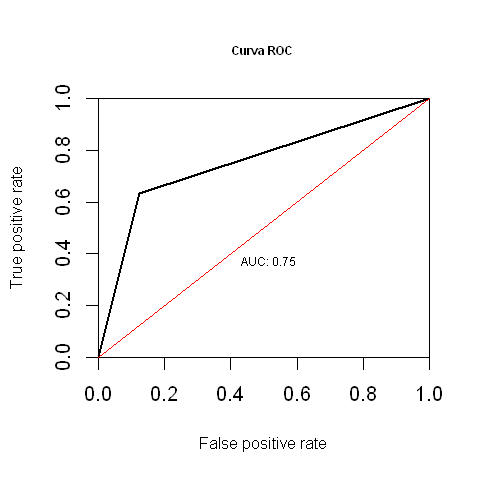

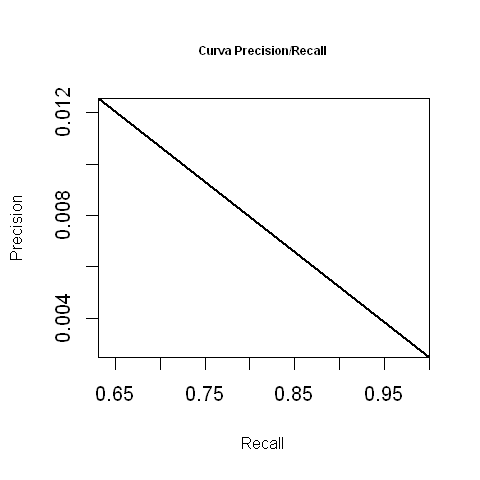

In [49]:
plot.roc.curve(previsao2, title.text = "Curva ROC")
plot.pr.curve(previsao2, title.text = "Curva Precision/Recall")

### **MODELO 3 - SUPPORT VECTOR MACHINES (pacote:e1071)**

In [50]:
# MODELO
modelo.svm.e1071 <- svm(Aplicativo.Baixado ~ ., data = dados_treino_down_sample, type = 'C-classification', kernel = 'radial')

In [51]:
# VISUALIZAÇÃO DO MODELO
summary(modelo.svm.e1071)


Call:
svm(formula = Aplicativo.Baixado ~ ., data = dados_treino_down_sample, 
    type = "C-classification", kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  6886

 ( 3422 3464 )


Number of Classes:  2 

Levels: 
 0 1




In [52]:
# PREVISÃO DO MODELO
previsao.modelo.svm.e1071 <- predict(modelo.svm.e1071, dados_teste_final) 

In [53]:
# MATRIZ DE CONFUSÃO
matriz_confusao3 <- table(Previsto = previsao.modelo.svm.e1071, Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao3

        Reference
Previsto       0       1
       0 1208028     847
       1  138647    2478

#### **MÉTRICAS  DO MODELO SVM e1071**

In [54]:
metricas_class(matriz_confusao3, "Modelo SVM e1071:")

Modelo SVM e1071: 
 
Acuracia   = 0.8967 
Recall     = 0.897 
Precisao   = 0.9993 
F1 Score   = 0.9454

In [55]:
# CURVA ROC 
previsao3 <- prediction(as.numeric(previsao.modelo.svm.e1071), dados_teste_final$Aplicativo.Baixado)

In [56]:
pred3 <- performance(previsao3,"auc"); 
auc3 <- round(as.numeric(pred3@y.values), 4)
cat("AUC =", auc3)

AUC = 0.8212

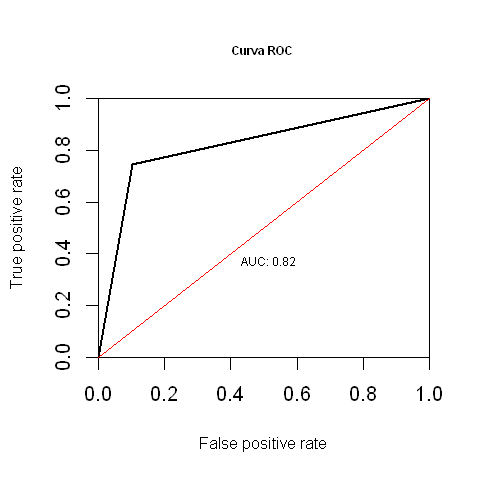

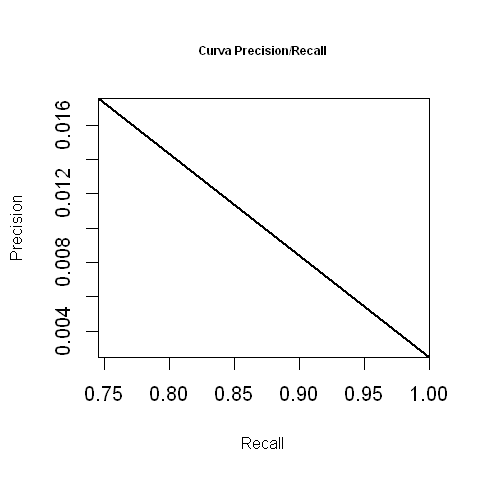

In [57]:
plot.roc.curve(previsao3, title.text = "Curva ROC")
plot.pr.curve(previsao3, title.text = "Curva Precision/Recall")

### **MODELO 4 - SUPPORT VECTOR MACHINES (pacote:kernlab)**

In [58]:
# MODELO
modelo.svm.kernlab <- ksvm(Aplicativo.Baixado ~., data = dados_treino_down_sample, kernel = "vanilladot")

 Setting default kernel parameters  


In [59]:
# VISUALIZAÇÃO DO MODELO
summary(modelo.svm.kernlab)

Length  Class   Mode 
     1   ksvm     S4 

In [60]:
# PREVISÃO DO MODELO
previsao.modelo.svm.kernlab <- predict(modelo.svm.kernlab, dados_teste_final)

In [61]:
# MATRIZ DE CONFUSÃO
matriz_confusao4 <- table(Previsto = previsao.modelo.svm.kernlab, Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao4 

        Reference
Previsto       0       1
       0 1102250     913
       1  244425    2412

In [62]:
# MATRIZ DE CONFUSÃO (OUTRO MODO COM O caret)
library(caret)
matriz_confusao4.1 <- confusionMatrix(previsao.modelo.svm.kernlab, dados_teste_final$Aplicativo.Baixado)
matriz_confusao4.1

Confusion Matrix and Statistics

          Reference
Prediction       0       1
         0 1102250     913
         1  244425    2412
                                             
               Accuracy : 0.8183             
                 95% CI : (0.8176, 0.8189)   
    No Information Rate : 0.9975             
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.0145             
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.818497           
            Specificity : 0.725414           
         Pos Pred Value : 0.999172           
         Neg Pred Value : 0.009772           
             Prevalence : 0.997537           
         Detection Rate : 0.816481           
   Detection Prevalence : 0.817158           
      Balanced Accuracy : 0.771955           
                                      

#### **MÉTRICAS  DO MODELO SVM kernlab**

In [63]:
metricas_class(matriz_confusao4, "Modelo SVM kernlab:")

Modelo SVM kernlab: 
 
Acuracia   = 0.8183 
Recall     = 0.8185 
Precisao   = 0.9992 
F1 Score   = 0.8999

In [64]:
# CURVA ROC
previsao4 <- prediction(as.double(previsao.modelo.svm.kernlab), dados_teste_final$Aplicativo.Baixado)

In [65]:
pred4 <- performance(previsao4,"auc"); 
auc4 <- round(as.numeric(pred4@y.values), 4)
cat("AUC =", auc4)

AUC = 0.772

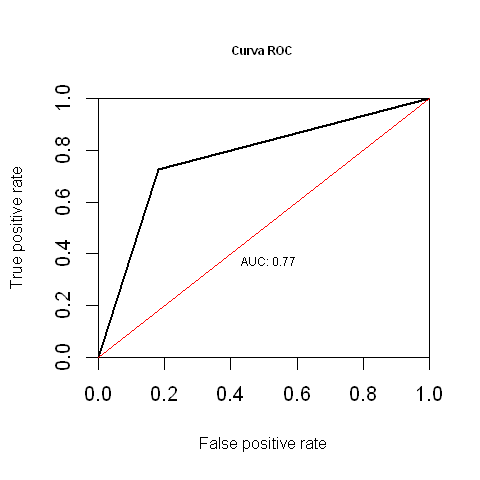

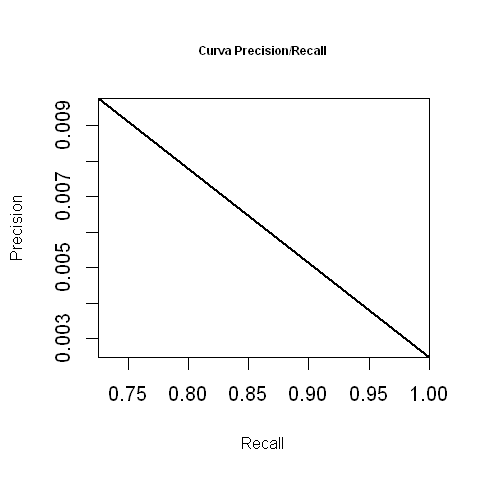

In [66]:
plot.roc.curve(previsao4, title.text = "Curva ROC")
plot.pr.curve(previsao4, title.text = "Curva Precision/Recall")

### **MODELO 5 - KNN (pacote:class)**

In [67]:
# MODELO E PREVISÃO
modelo.knn <- knn(train = dados_treino_down_sample, 
                     test = dados_teste_final,
                     cl = dados_treino_down_sample$Aplicativo.Baixado, 
                     k = 15)

In [68]:
# VISUALIZAÇÃO DO MODELO
summary(modelo.knn)

0       1 
1028092  321908

In [69]:
# MATRIZ DE CONFUSÃO
matriz_confusao5 <- table(Previsto = modelo.knn, Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao5

        Reference
Previsto       0       1
       0 1026850    1242
       1  319825    2083

#### **MÉTRICAS  DO MODELO KNN**

In [70]:
metricas_class(matriz_confusao5, "Modelo KNN:")

Modelo KNN: 
 
Acuracia   = 0.7622 
Recall     = 0.7625 
Precisao   = 0.9988 
F1 Score   = 0.8648

In [71]:
# CURVA ROC
previsao5 <- prediction(as.double(modelo.knn), dados_teste_final$Aplicativo.Baixado)

In [72]:
pred5 <- performance(previsao5,"auc"); 
auc5 <- round(as.numeric(pred5@y.values), 4)
cat("AUC =", auc5)

AUC = 0.6945

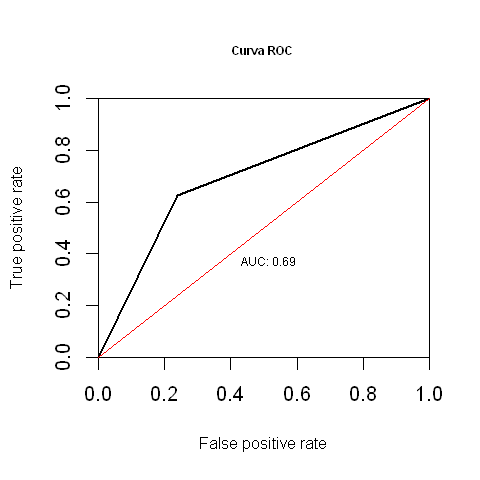

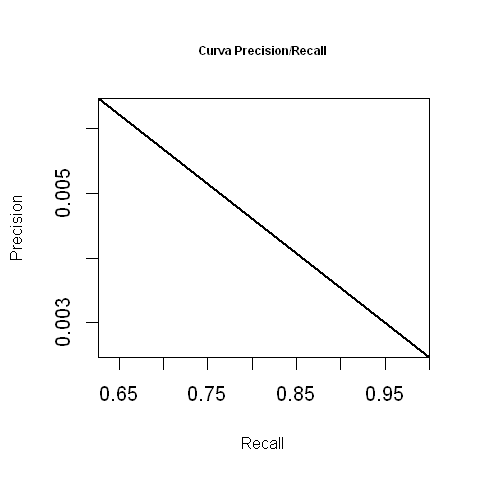

In [73]:
plot.roc.curve(previsao5, title.text = "Curva ROC")
plot.pr.curve(previsao5, title.text = "Curva Precision/Recall")

### **MODELO 6 - ÁRVORE DE DECISÃO (pacote:rpart)**

In [74]:
# MODELO
modelo.arvore.decisao <- rpart(Aplicativo.Baixado ~ . , method = 'class', data = dados_treino_down_sample)

In [75]:
# EXAMINA O RESULTADO DO MODELO DA ÁRVORE DE DECISÃO printcp()
printcp(modelo.arvore.decisao)


Classification tree:
rpart(formula = Aplicativo.Baixado ~ ., data = dados_treino_down_sample, 
    method = "class")

Variables actually used in tree construction:
[1] ID.App           ID.Canal.Anuncio

Root node error: 7757/15514 = 0.5

n= 15514 

        CP nsplit rel error  xerror      xstd
1 0.581153      0   1.00000 1.01315 0.0080279
2 0.065360      1   0.41885 0.41885 0.0065336
3 0.057368      2   0.35349 0.35349 0.0061250
4 0.036032      3   0.29612 0.29612 0.0057028
5 0.010000      5   0.22406 0.22406 0.0050644


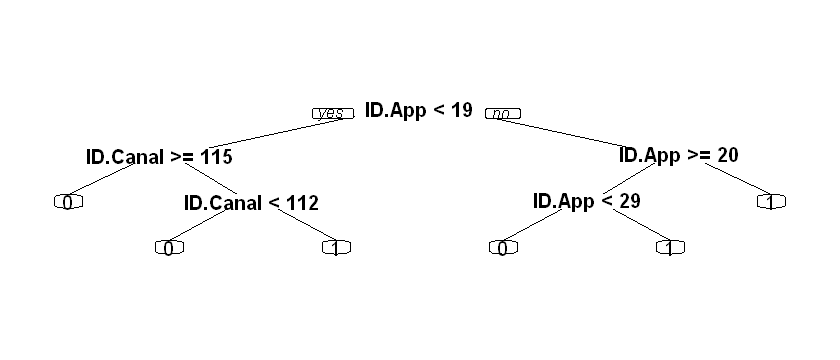

In [76]:
# PLOT DA ÁRVORE DE DECISÃO 
options(repr.plot.width = 7, repr.plot.height = 3)
prp(modelo.arvore.decisao)

In [77]:
# PREVISÃO DO MODELO
previsao.modelo.arvore.decisao <- predict(modelo.arvore.decisao, dados_teste_final, type='class')

In [78]:
# MATRIZ DE CONFUSÃO
matriz_confusao6 <- table(Previsto = previsao.modelo.arvore.decisao, 
                          Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao6

        Reference
Previsto       0       1
       0 1300162     593
       1   46513    2732

#### **MÉTRICAS DO MODELO DE ÁRVORE DE DECISÃO**

In [79]:
metricas_class(matriz_confusao6, "Modelo Árvore de Decisão:")

Modelo Árvore de Decisão: 
 
Acuracia   = 0.9651 
Recall     = 0.9655 
Precisao   = 0.9995 
F1 Score   = 0.9822

In [80]:
# CURVA ROC
previsao6 <- prediction(as.double(previsao.modelo.arvore.decisao), dados_teste_final$Aplicativo.Baixado)

In [81]:
pred6 <- performance(previsao6,"auc"); 
auc6 <- round(as.numeric(pred6@y.values), 4)
cat("AUC =", auc6)

AUC = 0.8936

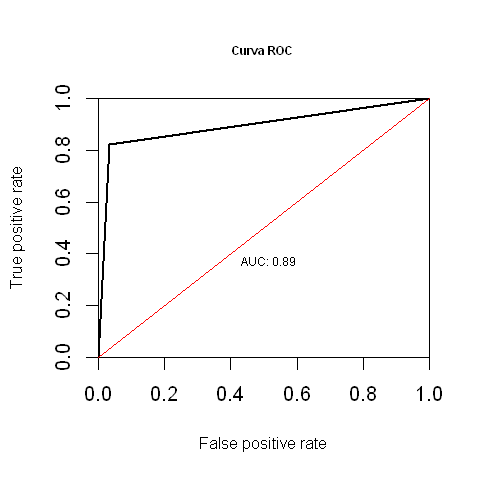

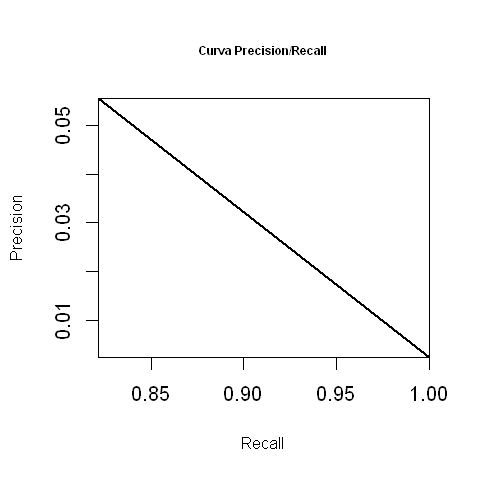

In [82]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot.roc.curve(previsao6, title.text = "Curva ROC")
plot.pr.curve(previsao6, title.text = "Curva Precision/Recall")

### **MODELO 7 - RANDOM FOREST (pacote:rpart)**

In [83]:
# MODELO
modelo.randomforest.rpart = rpart(Aplicativo.Baixado ~ ., data = dados_treino_down_sample, control = rpart.control(cp = .0005)) 

In [84]:
# VISUALIZAÇÃO DO MODELO
str(modelo.randomforest.rpart)

List of 14
 $ frame              :'data.frame':	93 obs. of  9 variables:
  ..$ var       : Factor w/ 6 levels "<leaf>","ID.App",..: 2 3 5 2 1 2 1 2 6 1 ...
  ..$ n         : int [1:93] 15514 9070 7335 6754 2681 4073 2583 1490 1166 58 ...
  ..$ wt        : num [1:93] 15514 9070 7335 6754 2681 ...
  ..$ dev       : num [1:93] 7757 2281 1160 928 188 ...
  ..$ yval      : num [1:93] 1 1 1 1 1 1 1 1 1 1 ...
  ..$ complexity: num [1:93] 0.58115 0.06536 0.00184 0.00184 0 ...
  ..$ ncompete  : int [1:93] 4 4 4 4 0 4 0 4 4 0 ...
  ..$ nsurrogate: int [1:93] 4 4 0 1 0 1 0 2 1 0 ...
  ..$ yval2     : num [1:93, 1:6] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:6] "" "" "" "" ...
 $ where              : Named int [1:15514] 7 5 7 7 62 5 62 62 5 7 ...
  ..- attr(*, "names")= chr [1:15514] "1" "2" "3" "4" ...
 $ call               : language rpart(formula = Aplicativo.Baixado ~ ., data = dados_treino_down_sample,      control = rpart.control(c

In [85]:
# PREVISAO DO MODELO
previsao.modelo.randomforest.rpart = predict(modelo.randomforest.rpart, dados_teste_final, type='class')

In [86]:
# MATRIZ DE CONFUSÃO
matriz_confusao7 <- table(Previsto = previsao.modelo.randomforest.rpart, Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao7

        Reference
Previsto       0       1
       0 1295345     465
       1   51330    2860

#### **MÉTRICAS DO MODELO RANDOM FOREST rpart**

In [87]:
metricas_class(matriz_confusao7, "Modelo Random Forest rpart:")

Modelo Random Forest rpart: 
 
Acuracia   = 0.9616 
Recall     = 0.9619 
Precisao   = 0.9996 
F1 Score   = 0.9804

In [88]:
# CURVA ROC
previsao7 <- prediction(as.numeric(previsao.modelo.randomforest.rpart), dados_teste_final$Aplicativo.Baixado)

In [89]:
pred7 <- performance(previsao7,"auc"); 
auc7 <- round(as.numeric(pred7@y.values), 4)
cat("AUC =", auc7)

AUC = 0.911

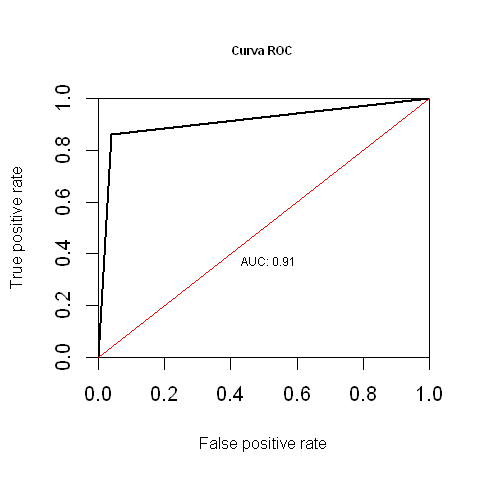

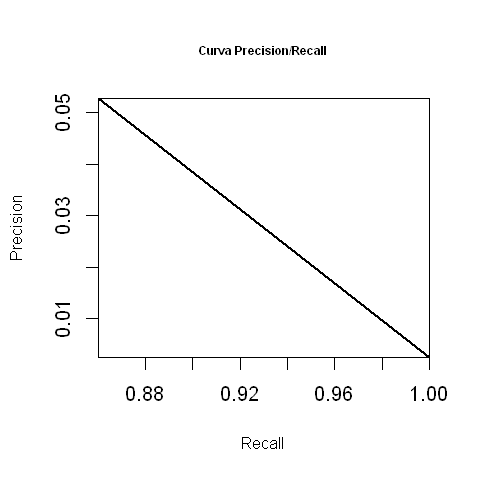

In [90]:
plot.roc.curve(previsao7, title.text = "Curva ROC")
plot.pr.curve(previsao7, title.text = "Curva Precision/Recall")

### **MODELO 8 - RANDOM FOREST (pacote: randomForest)**

In [ ]:
# MODELO
#modelo.randomforest.randomForest <- randomForest(Aplicativo.Baixado ~ ., 
#                                                 data = dados_treino_down_sample,  ntree = 500, nodesize = 10)      

In [ ]:
# VISUALIZANDO O MODELO
#print(modelo.randomforest.randomForest)

In [ ]:
# SALVANDO O MODELO TREINADO
#saveRDS(modelo.randomforest.randomForest, "modelo.randomforest.randomForest.rds")

In [91]:
# CARREGANDO O MODELO TREINADO
modelo.randomforest.randomForest <- readRDS("modelo.randomforest.randomForest.rds")

In [92]:
# VISUALIZANDO O MODELO
print(modelo.randomforest.randomForest)


Call:
 randomForest(formula = Aplicativo.Baixado ~ ., data = dados_treino_down_sample,      ntree = 500, nodesize = 10) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 8.96%
Confusion matrix:
     0    1 class.error
0 7415  342  0.04408921
1 1048 6709  0.13510378


In [93]:
# PREVISAO DO MODELO
previsao.modelo.randomforest.randomForest = predict(modelo.randomforest.randomForest, dados_teste_final)

In [94]:
# MATRIZ DE CONFUSÃO
matriz_confusao8 <- table(Previsto = previsao.modelo.randomforest.randomForest,
                          Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao8

        Reference
Previsto       0       1
       0 1289151     435
       1   57524    2890

#### **MÉTRICAS  DO MODELO RANDOM FOREST randomForest**

In [95]:
metricas_class(matriz_confusao8, "Modelo Random Forest randomForest:")

Modelo Random Forest randomForest: 
 
Acuracia   = 0.9571 
Recall     = 0.9573 
Precisao   = 0.9997 
F1 Score   = 0.978

In [96]:
# CURVA ROC
previsao8 <- prediction(as.numeric(previsao.modelo.randomforest.randomForest), dados_teste_final$Aplicativo.Baixado)

In [97]:
pred8 <- performance(previsao8,"auc"); 
auc8 <- round(as.numeric(pred8@y.values), 4)
cat("AUC =", auc8)

AUC = 0.9132

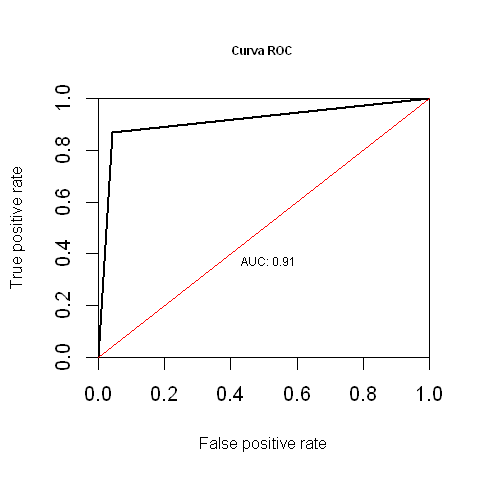

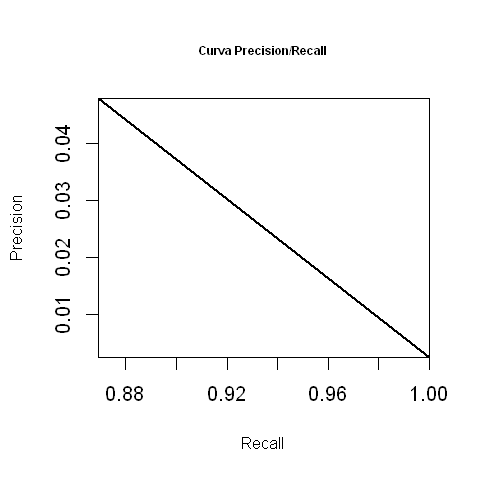

In [98]:
plot.roc.curve(previsao8, title.text = "Curva ROC")
plot.pr.curve(previsao8, title.text = "Curva Precision/Recall")

In [99]:
# CARREGANDO FUNÇÕES  DE MÉTRICAS (acuracia, precisao, recall, f1_score) PARA SEREM USADAS A PARTIR DA MATRIZ DE CONFUSÃO
# FUNÇÕES DE source("Metricas_classificacao.R") 

Modelo <- c('Regressao Logistica','Naive Bayes','SVM','SVM','KNN','Decision tree','Random Forest','Random Forest')
Pacote <- c('caret', 'e1071', 'e1071', 'kernlab', 'class', 'rpart', 'rpart', 'randomForest')
TP <- c(matriz_confusao1[1,1], matriz_confusao2[1,1], matriz_confusao3[1,1], matriz_confusao4[1,1], matriz_confusao5[1,1],
      matriz_confusao6[1,1], matriz_confusao7[1,1], matriz_confusao8[1,1])

TN <- c(matriz_confusao1[2,2], matriz_confusao2[2,2], matriz_confusao3[2,2], matriz_confusao4[2,2], matriz_confusao5[2,2],
      matriz_confusao6[2,2], matriz_confusao7[2,2], matriz_confusao8[2,2])

FP <- c(matriz_confusao1[1,2], matriz_confusao2[1,2], matriz_confusao3[1,2], matriz_confusao4[1,2], matriz_confusao5[1,2],
      matriz_confusao6[1,2], matriz_confusao7[1,2], matriz_confusao8[1,2])

FN <- c(matriz_confusao1[2,1], matriz_confusao2[2,1], matriz_confusao3[2,1], matriz_confusao4[2,1], matriz_confusao5[2,1],
      matriz_confusao6[2,1], matriz_confusao7[2,1], matriz_confusao8[2,1])

Acuracia <- c(acuracia(matriz_confusao1), acuracia(matriz_confusao2), acuracia(matriz_confusao3), acuracia(matriz_confusao4), 
              acuracia(matriz_confusao5), acuracia(matriz_confusao6), acuracia(matriz_confusao7), acuracia(matriz_confusao8))

Precisao <- c(precisao(matriz_confusao1), precisao(matriz_confusao2), precisao(matriz_confusao3), precisao(matriz_confusao4), 
              precisao(matriz_confusao5), precisao(matriz_confusao6), precisao(matriz_confusao7), precisao(matriz_confusao8))

Recall <- c(recall(matriz_confusao1), recall(matriz_confusao2), recall(matriz_confusao3), recall(matriz_confusao4), 
              recall(matriz_confusao5), recall(matriz_confusao6), recall(matriz_confusao7), recall(matriz_confusao8))

F1_score <- c(f1_score(matriz_confusao1), f1_score(matriz_confusao2), f1_score(matriz_confusao3), f1_score(matriz_confusao4), 
              f1_score(matriz_confusao5), f1_score(matriz_confusao6), f1_score(matriz_confusao7), f1_score(matriz_confusao8))

AUC <- c(auc1, auc2, auc3, auc4, auc5, auc6, auc7, auc8)

                               TABELA COMPARATIVA DOS RESULTADOS DOS MODELOS

In [100]:
Tabela = data.frame(Modelo, Pacote, TP, TN, FP, FN,Acuracia, Precisao, Recall, F1_score, AUC)
Tabela[order(Tabela$Acuracia, Tabela$AUC, Tabela$TP, decreasing = T),]

,Modelo,Pacote,TP,TN,FP,FN,Acuracia,Precisao,Recall,F1_score,AUC
6,Decision tree,rpart,1300162,2732,593,46513,0.9651067,0.9995441,0.9654609,0.9822069,0.8936
7,Random Forest,rpart,1295345,2860,465,51330,0.9616333,0.9996412,0.9618839,0.9803991,0.9110
8,Random Forest,randomForest,1289151,2890,435,57524,0.9570674,0.9996627,0.9572844,0.9780147,0.9132
3,SVM,e1071,1208028,2478,847,138647,0.8966711,0.9992993,0.8970449,0.9454153,0.8212
2,Naive Bayes,e1071,1181586,2099,1226,165089,0.8768037,0.9989635,0.8774099,0.9342495,0.7543
4,SVM,kernlab,1102250,2412,913,244425,0.8182681,0.9991724,0.8184974,0.8998554,0.7720
1,Regressao Logistica,caret,1085822,2454,871,260853,0.8061304,0.9991985,0.8062985,0.8924437,0.8439
5,KNN,class,1026850,2083,1242,319825,0.7621726,0.9987919,0.7625077,0.8648006,0.6945


In [ ]:
# TP = APLICATIVO NÃO FOI BAIXADO E O CLASSIFICOU COMO NÃO BAIXADO (ACERTO)
# TN = APLICATIVO FOI BAIXADO E O MODELO CLASSIFICOU COMO BAIXADO (ACERTOU)
# FP = APLICATIVO FOI BAIXADO E O MODELO CLASSIFICOU COMO NÃO BAIXADO (ERROU)
# FN = APLICATIVO NÃO FOI BAIXADO E O MODELO CLASSIFICOU COMO BAIXADO (ERROU)

A Decision Tree obteve a maior acurácia e o número de True Positivo (TP) maior que todos os outros modelos e a terceira maior AUC, com 0.89. embora a Decision Tree tenha a maior acurácia e a maior quantidade de True Positivos, os dois modelos Random Forest (7 e 8) obtiveram valores parecidos (precisão, recall e f1 score), porém com a AUC superior ao Decision Tree, com 0.91 cada. também obtiveram um número de Falsos Positivos (FP) menor.

Penso que com o número de Falsos Positivos menor (FP), a empresa poderia estar colocando em sua lista negra **menos** IPs de cliques que baixaram o aplicativo, mas que foram classificados como cliques que não baixaram.


EX. FP (aplicativo foi baixado e o modelo classificou como não baixado)

Decision tree - rpart
593/3325 = 17,83%

Random Forest - rpart 
465/3325 = 13,98%
(O modelo 7 foi o que escolhi, pois teve uma das melhores acurácias e AUC e o segundo menor FP e FN)

Random Forest - randomForest 
435/3325 = 13,08%
